In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

In [7]:
df

,Date,Unique Event ID,Event Type,Business Line,Event Description,Net Loss Amount
0,2023-12-11 23:43:50.099916,EID00000,Regulatory Violation,Insurance,Lost assets,7401.525529
1,2021-08-19 23:43:50.099916,EID00001,Market Risk,Financial Advisory,Unauthorized transaction,-3521.361524
2,2022-07-17 23:43:50.099916,EID00002,Regulatory Violation,Retail,Network failure,-5510.492671
3,2023-12-02 23:43:50.099916,EID00003,Natural Disaster,Corporate Banking,Network failure,5495.573131
4,2024-06-20 23:43:50.099916,EID00004,Fraud,Private Banking,Network failure,-9473.743038
...,...,...,...,...,...,...
9995,2023-08-18 23:43:50.099916,EID09995,Fraud,Investment Banking,Unauthorized transaction,8648.912158
9996,2023-03-09 23:43:50.099916,EID09996,Vendor Risk,Mortgage Lending,Supplier issues,4121.779915
9997,2023-10-10 23:43:50.099916,EID09997,Fraud,Investment Banking,Regulatory fines,6904.500030
9998,2024-05-28 23:43:50.099916,EID09998,Natural Disaster,Retail,Lost assets,9584.901909


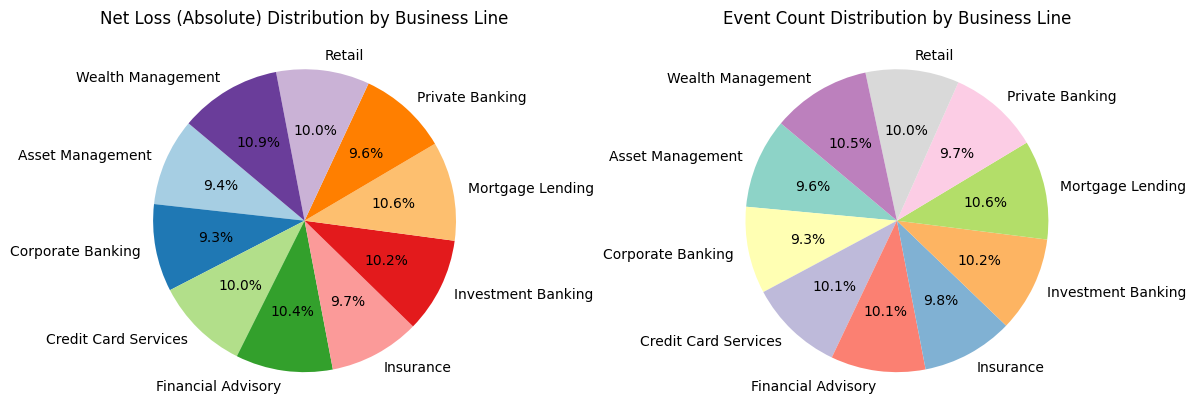

In [10]:
import matplotlib.pyplot as plt

# Prepare data
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()  # Use absolute values for Net Loss
grouped_data = df.groupby('Business Line').agg({
    'Net Loss Absolute': 'sum',  # Sum of absolute Net Loss
    'Unique Event ID': 'count'   # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Plot for Net Loss (Absolute)
plt.figure(figsize=(12, 6))

# Pie chart for Net Loss Amount (Absolute)
plt.subplot(1, 2, 1)
plt.pie(
    grouped_data['Net Loss Absolute'], 
    labels=grouped_data.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Net Loss (Absolute) Distribution by Business Line")

# Pie chart for Event Count
plt.subplot(1, 2, 2)
plt.pie(
    grouped_data['Event Count'], 
    labels=grouped_data.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors
)
plt.title("Event Count Distribution by Business Line")

plt.tight_layout()
plt.show()


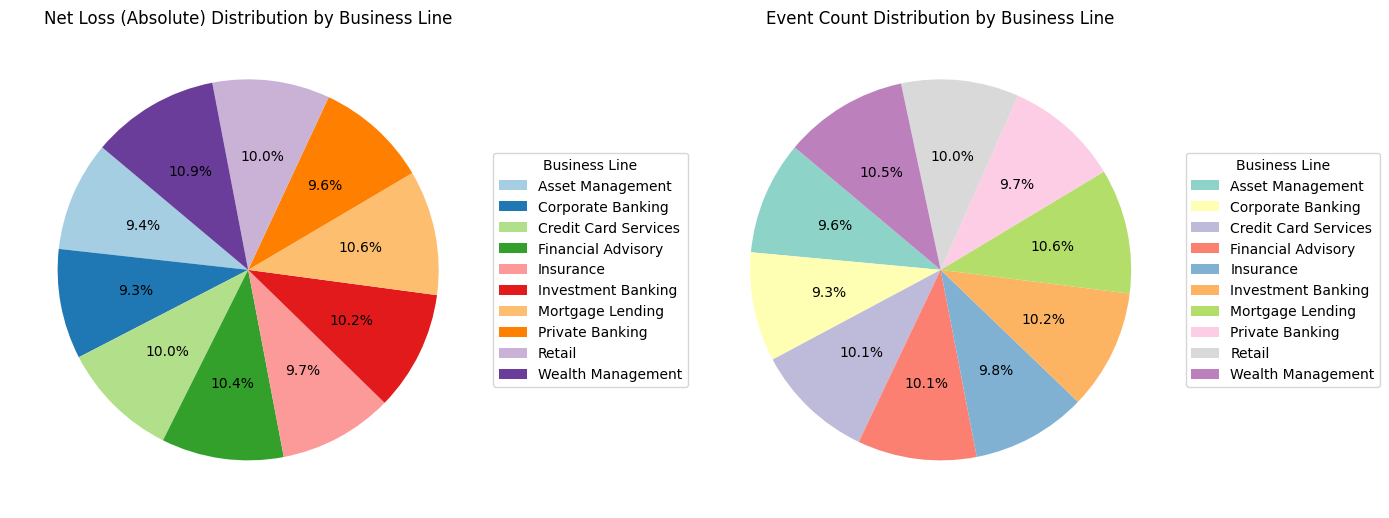

In [11]:
import matplotlib.pyplot as plt

# Prepare data
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()  # Use absolute values for Net Loss
grouped_data = df.groupby('Business Line').agg({
    'Net Loss Absolute': 'sum',  # Sum of absolute Net Loss
    'Unique Event ID': 'count'   # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Plot for Net Loss (Absolute)
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Net Loss Amount (Absolute)
wedges1, texts1, autotexts1 = ax[0].pie(
    grouped_data['Net Loss Absolute'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
ax[0].set_title("Net Loss (Absolute) Distribution by Business Line")
ax[0].legend(wedges1, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for Event Count
wedges2, texts2, autotexts2 = ax[1].pie(
    grouped_data['Event Count'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors
)
ax[1].set_title("Event Count Distribution by Business Line")
ax[1].legend(wedges2, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


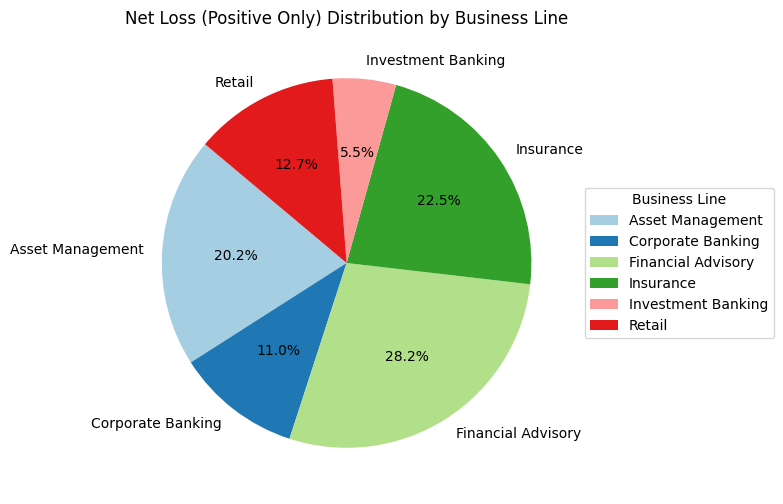

In [12]:
# Group data by Business Line without taking absolute values
grouped_data = df.groupby('Business Line').agg({
    'Net Loss Amount': 'sum',  # Sum Net Loss directly (can include negative values)
    'Unique Event ID': 'count'  # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Plot Net Loss only for non-negative values (for pie chart compatibility)
positive_loss_data = grouped_data[grouped_data['Net Loss Amount'] > 0]

plt.figure(figsize=(10, 6))
plt.pie(
    positive_loss_data['Net Loss Amount'], 
    labels=positive_loss_data.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Net Loss (Positive Only) Distribution by Business Line")
plt.legend(title="Business Line", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


ValueError: Wedge sizes 'x' must be non negative values

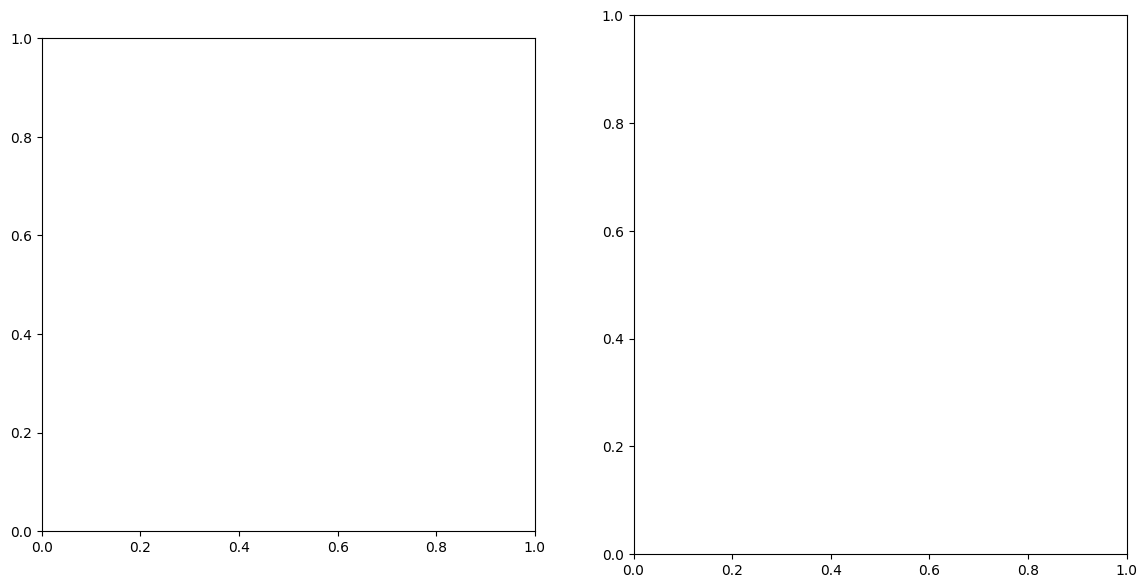

In [13]:
import matplotlib.pyplot as plt

# Prepare data (no absolute values, keep both gains and losses)
grouped_data = df.groupby('Business Line').agg({
    'Net Loss Amount': 'sum',  # Sum Net Loss as is (including negative values)
    'Unique Event ID': 'count'  # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Plot for Net Loss including both negative and positive values
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Net Loss Amount (with both negative and positive values)
wedges1, texts1, autotexts1 = ax[0].pie(
    grouped_data['Net Loss Amount'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
ax[0].set_title("Net Loss Distribution by Business Line")
ax[0].legend(wedges1, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for Event Count
wedges2, texts2, autotexts2 = ax[1].pie(
    grouped_data['Event Count'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors
)
ax[1].set_title("Event Count Distribution by Business Line")
ax[1].legend(wedges2, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


ValueError: Wedge sizes 'x' must be non negative values

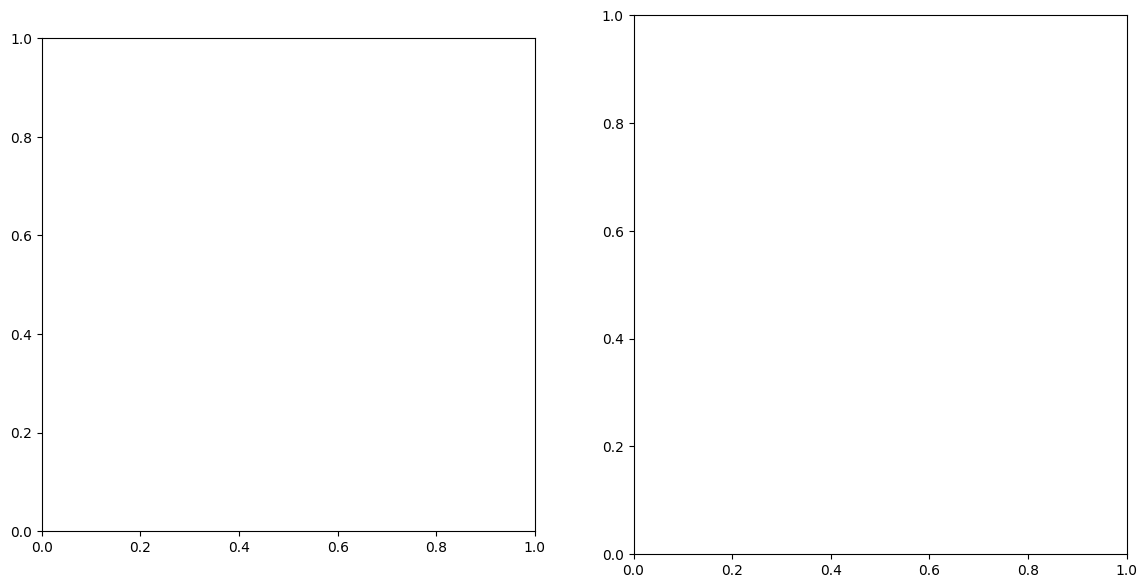

In [14]:
import matplotlib.pyplot as plt

# Filter the data to exclude 2021 (use 2022 to 2024 data)
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format
filtered_df = df[df['Date'].dt.year >= 2022]  # Select data from 2022 to 2024

# Group by Business Line for the filtered data
grouped_data = filtered_df.groupby('Business Line').agg({
    'Net Loss Amount': 'sum',  # Sum of Net Loss
    'Unique Event ID': 'count'  # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Plot for Net Loss and Event Count (2022-2024)
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Net Loss Amount (including both negative and positive values)
wedges1, texts1, autotexts1 = ax[0].pie(
    grouped_data['Net Loss Amount'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
ax[0].set_title("Net Loss Distribution (2022-2024) by Business Line")
ax[0].legend(wedges1, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for Event Count (2022-2024)
wedges2, texts2, autotexts2 = ax[1].pie(
    grouped_data['Event Count'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors
)
ax[1].set_title("Event Count Distribution (2022-2024) by Business Line")
ax[1].legend(wedges2, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_17596\3948852664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Net Loss Positive'] = filtered_df['Net Loss Amount'].apply(lambda x: x if x > 0 else 0)
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_17596\3948852664.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Net Loss Negative'] = filtered_df['Net Loss Amount'].apply(lambda x: -x if x < 0 else 0)


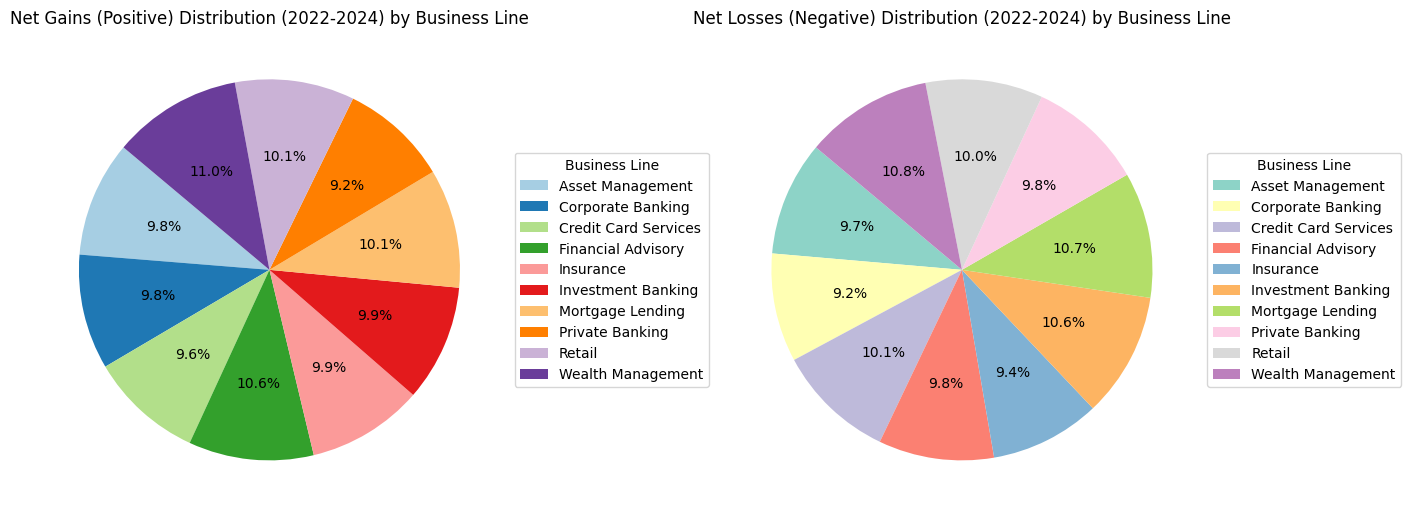

In [15]:
import matplotlib.pyplot as plt

# Filter the data to exclude 2021 (use 2022 to 2024 data)
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format
filtered_df = df[df['Date'].dt.year >= 2022]  # Select data from 2022 to 2024

# Separate positive (gains) and negative (losses) Net Loss Amount
filtered_df['Net Loss Positive'] = filtered_df['Net Loss Amount'].apply(lambda x: x if x > 0 else 0)
filtered_df['Net Loss Negative'] = filtered_df['Net Loss Amount'].apply(lambda x: -x if x < 0 else 0)

# Group by Business Line and aggregate positive and negative net losses
grouped_data = filtered_df.groupby('Business Line').agg({
    'Net Loss Positive': 'sum',  # Sum of positive net losses (gains)
    'Net Loss Negative': 'sum',  # Sum of negative net losses (losses)
    'Unique Event ID': 'count'   # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Plot for Net Loss (Positive and Negative) and Event Count (2022-2024)
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Net Loss Positive (Gains)
wedges1, texts1, autotexts1 = ax[0].pie(
    grouped_data['Net Loss Positive'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
ax[0].set_title("Net Gains (Positive) Distribution (2022-2024) by Business Line")
ax[0].legend(wedges1, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for Net Loss Negative (Losses)
wedges2, texts2, autotexts2 = ax[1].pie(
    grouped_data['Net Loss Negative'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors
)
ax[1].set_title("Net Losses (Negative) Distribution (2022-2024) by Business Line")
ax[1].legend(wedges2, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_17596\1651013979.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Net Loss Positive'] = filtered_df['Net Loss Amount'].apply(lambda x: x if x > 0 else 0)
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_17596\1651013979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Net Loss Negative'] = filtered_df['Net Loss Amount'].apply(lambda x: -x if x < 0 else 0)


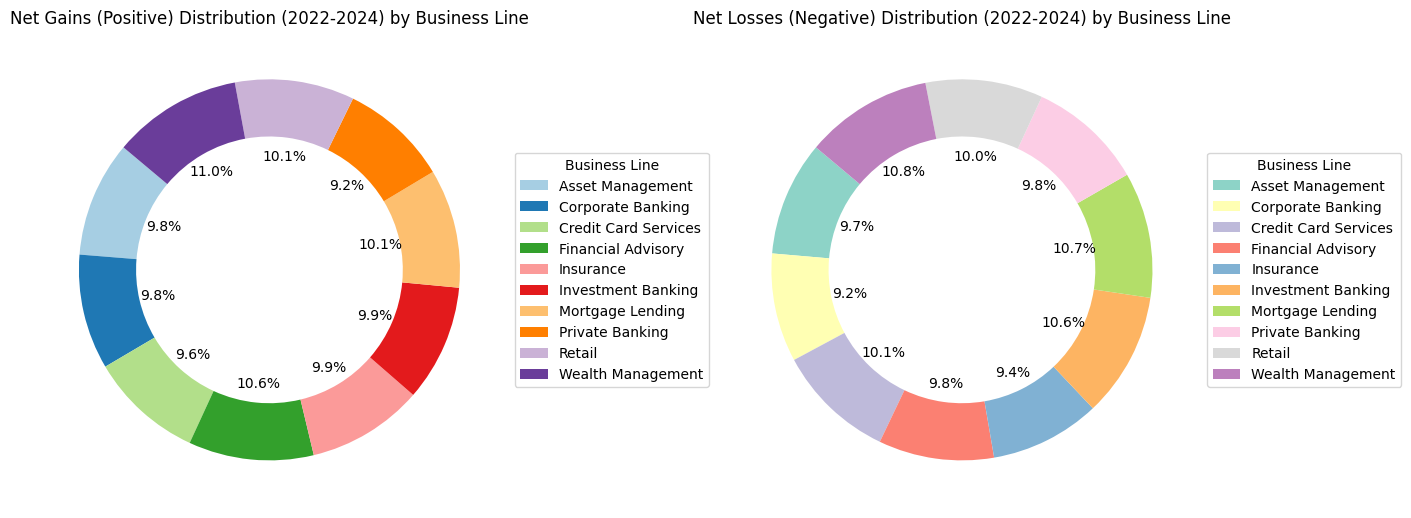

In [16]:
import matplotlib.pyplot as plt
############################# Circle inside
# Filter data for 2022-2024, separate positive and negative Net Loss Amount
df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[df['Date'].dt.year >= 2022]

filtered_df['Net Loss Positive'] = filtered_df['Net Loss Amount'].apply(lambda x: x if x > 0 else 0)
filtered_df['Net Loss Negative'] = filtered_df['Net Loss Amount'].apply(lambda x: -x if x < 0 else 0)

grouped_data = filtered_df.groupby('Business Line').agg({
    'Net Loss Positive': 'sum',
    'Net Loss Negative': 'sum',
    'Unique Event ID': 'count'
}).rename(columns={'Unique Event ID': 'Event Count'})

# Create a figure with custom size
fig, ax = plt.subplots(1, 2, figsize=(14, 7))  # Larger figure size for better space

# Pie chart for Net Gains (Positive)
wedges1, texts1, autotexts1 = ax[0].pie(
    grouped_data['Net Loss Positive'], 
    labels=None,  
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors,
    wedgeprops={'width': 0.3}  # Control the pie size with width
)
ax[0].set_title("Net Gains (Positive) Distribution (2022-2024) by Business Line")
ax[0].legend(wedges1, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for Net Losses (Negative)
wedges2, texts2, autotexts2 = ax[1].pie(
    grouped_data['Net Loss Negative'], 
    labels=None,  
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors,
    wedgeprops={'width': 0.3}  # Control the pie size with width
)
ax[1].set_title("Net Losses (Negative) Distribution (2022-2024) by Business Line")
ax[1].legend(wedges2, grouped_data.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()  # Ensure everything fits properly within the figure
plt.show()


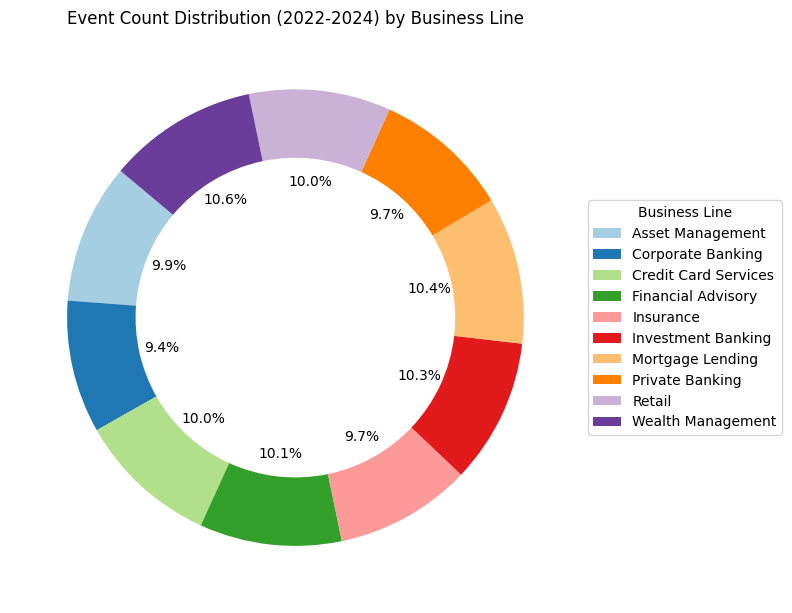

In [17]:
import matplotlib.pyplot as plt

# Filter data for 2022-2024 (exclude 2021)
df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[df['Date'].dt.year >= 2022]  # Select data from 2022 to 2024

# Group by Business Line and count the number of events
grouped_data_event_count = filtered_df.groupby('Business Line').agg({
    'Unique Event ID': 'count'  # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Create a figure with custom size
fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted for a square-shaped pie chart

# Pie chart for Event Count distribution (2022-2024)
wedges, texts, autotexts = ax.pie(
    grouped_data_event_count['Event Count'], 
    labels=None,  # Suppress labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors,  # Adjust colors as needed
    wedgeprops={'width': 0.3}  # Adjust width if needed
)

ax.set_title("Event Count Distribution (2022-2024) by Business Line")
ax.legend(wedges, grouped_data_event_count.index, title="Business Line", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()


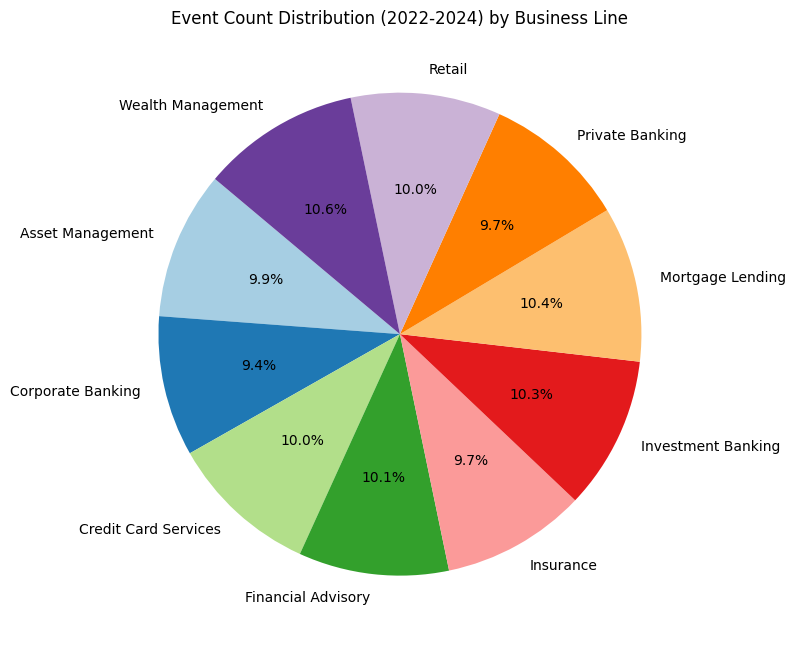

In [18]:
import matplotlib.pyplot as plt

# Filter data for 2022-2024 (exclude 2021)
df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[df['Date'].dt.year >= 2022]  # Select data from 2022 to 2024

# Group by Business Line and count the number of events
grouped_data_event_count = filtered_df.groupby('Business Line').agg({
    'Unique Event ID': 'count'  # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Create a pie chart for Event Count distribution (2022-2024)
fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted for a square-shaped pie chart

# Pie chart for Event Count distribution (2022-2024)
ax.pie(
    grouped_data_event_count['Event Count'], 
    labels=grouped_data_event_count.index,  # Labels are the Business Line names
    autopct='%1.1f%%',  # Display percentages on each slice
    startangle=140,  # Start the pie chart from an angle
    colors=plt.cm.Paired.colors  # Colors for each slice
)

ax.set_title("Event Count Distribution (2022-2024) by Business Line")

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()


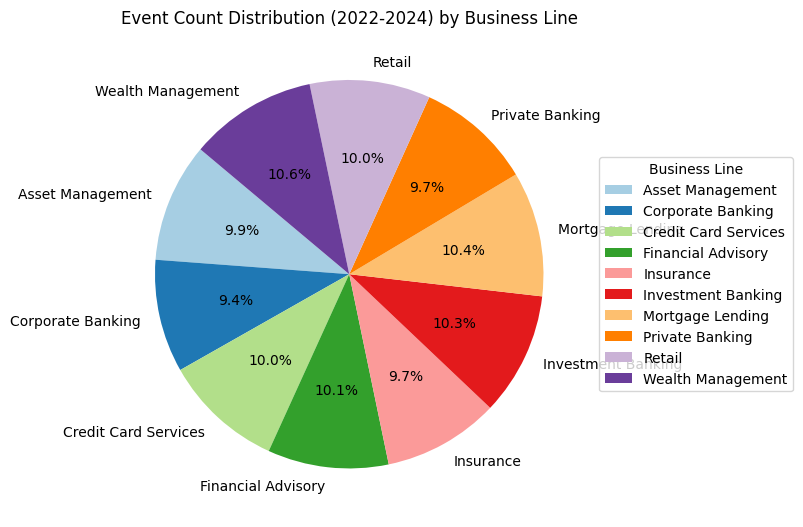

In [19]:
import matplotlib.pyplot as plt

# Filter data for 2022-2024 (exclude 2021)
df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[df['Date'].dt.year >= 2022]  # Select data from 2022 to 2024

# Group by Business Line and count the number of events
grouped_data_event_count = filtered_df.groupby('Business Line').agg({
    'Unique Event ID': 'count'  # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Create a pie chart for Event Count distribution (2022-2024)
fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted for a square-shaped pie chart

# Pie chart for Event Count distribution (2022-2024)
wedges, texts, autotexts = ax.pie(
    grouped_data_event_count['Event Count'], 
    labels=grouped_data_event_count.index,  # Labels are the Business Line names
    autopct='%1.1f%%',  # Display percentages on each slice
    startangle=140,  # Start the pie chart from an angle
    colors=plt.cm.Paired.colors  # Colors for each slice
)

# Add title
ax.set_title("Event Count Distribution (2022-2024) by Business Line")

# Add legend outside the pie chart
ax.legend(
    wedges, 
    grouped_data_event_count.index, 
    title="Business Line", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)  # Places the legend outside the pie chart
)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()


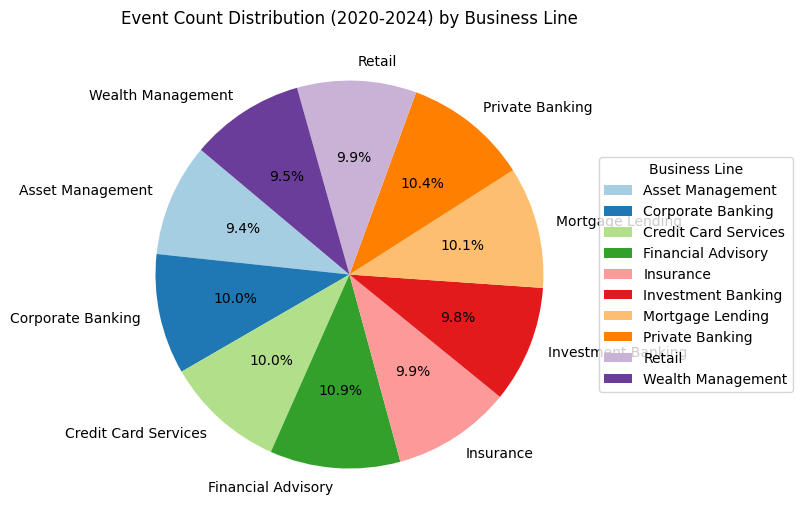

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove records where Net Loss Amount is greater than 20 million (positive or negative)
df_filtered = df[abs(df['Net Loss Amount']) <= 20000000]

# Filter data for all 4 years (2020-2024)
df_filtered = df_filtered[df_filtered['Date'].dt.year >= 2020]

# Group by Business Line and count the number of events
grouped_data_event_count = df_filtered.groupby('Business Line').agg({
    'Unique Event ID': 'count'  # Count of events
}).rename(columns={'Unique Event ID': 'Event Count'})

# Create a pie chart for Event Count distribution (2020-2024)
fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted for a square-shaped pie chart

# Pie chart for Event Count distribution (2020-2024)
wedges, texts, autotexts = ax.pie(
    grouped_data_event_count['Event Count'], 
    labels=grouped_data_event_count.index,  # Labels are the Business Line names
    autopct='%1.1f%%',  # Display percentages on each slice
    startangle=140,  # Start the pie chart from an angle
    colors=plt.cm.Paired.colors  # Colors for each slice
)

# Add title
ax.set_title("Event Count Distribution (2020-2024) by Business Line")

# Add legend outside the pie chart
ax.legend(
    wedges, 
    grouped_data_event_count.index, 
    title="Business Line", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)  # Places the legend outside the pie chart
)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()


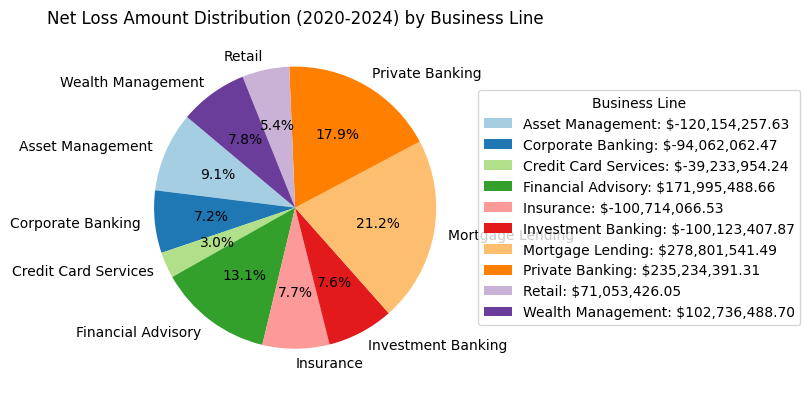

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove records where Net Loss Amount is greater than 20 million (positive or negative)
df_filtered = df[abs(df['Net Loss Amount']) <= 20000000]

# Filter data for all 4 years (2020-2024)
df_filtered = df_filtered[df_filtered['Date'].dt.year >= 2020]

# Group by Business Line and sum the Net Loss Amount
grouped_data_net_loss = df_filtered.groupby('Business Line').agg({
    'Net Loss Amount': 'sum'  # Sum of Net Loss Amount
})

# Create a pie chart for Net Loss Amount distribution (2020-2024)
fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted for a square-shaped pie chart

# Use absolute values for the pie chart calculation
absolute_values = grouped_data_net_loss['Net Loss Amount'].abs()

# Pie chart for Net Loss Amount distribution (2020-2024)
wedges, texts, autotexts = ax.pie(
    absolute_values, 
    labels=grouped_data_net_loss.index,  # Labels are the Business Line names
    autopct='%1.1f%%',  # Display percentages on each slice
    startangle=140,  # Start the pie chart from an angle
    colors=plt.cm.Paired.colors  # Colors for each slice
)

# Add title
ax.set_title("Net Loss Amount Distribution (2020-2024) by Business Line")

# Add legend outside the pie chart
ax.legend(
    wedges, 
    [f"{line}: ${net_loss:,.2f}" for line, net_loss in zip(grouped_data_net_loss.index, grouped_data_net_loss['Net Loss Amount'])],
    title="Business Line", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)  # Places the legend outside the pie chart
)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_17596\4017843952.py:94: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


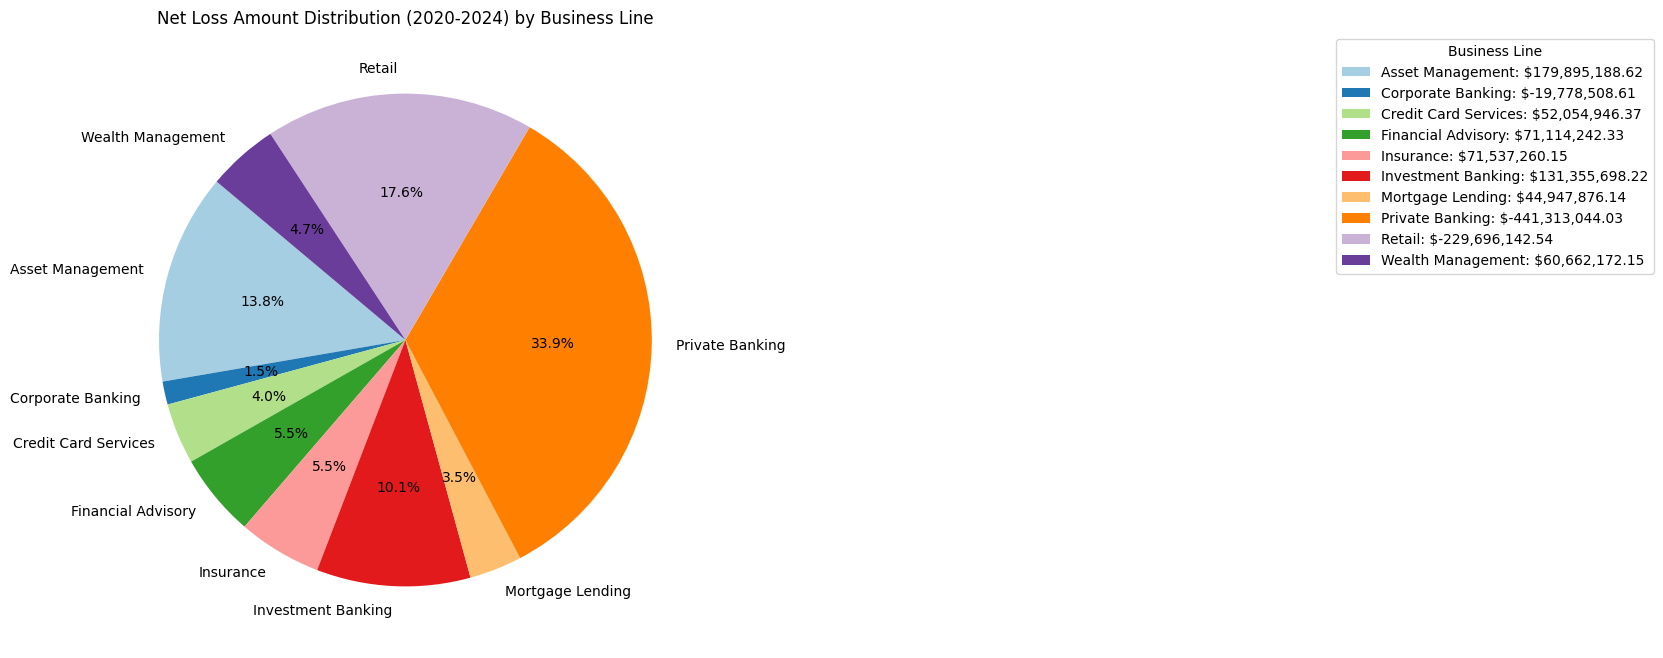

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove records where Net Loss Amount is greater than 20 million (positive or negative)
df_filtered = df[abs(df['Net Loss Amount']) <= 20000000]

# Filter data for all 4 years (2020-2024)
df_filtered = df_filtered[df_filtered['Date'].dt.year >= 2020]

# Group by Business Line and sum the Net Loss Amount
grouped_data_net_loss = df_filtered.groupby('Business Line').agg({
    'Net Loss Amount': 'sum'  # Sum of Net Loss Amount
})

# Create a pie chart for Net Loss Amount distribution (2020-2024)
fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted for a square-shaped pie chart

# Use absolute values for the pie chart calculation
absolute_values = grouped_data_net_loss['Net Loss Amount'].abs()

# Pie chart for Net Loss Amount distribution (2020-2024)
wedges, texts, autotexts = ax.pie(
    absolute_values, 
    labels=grouped_data_net_loss.index,  # Labels are the Business Line names
    autopct='%1.1f%%',  # Display percentages on each slice
    startangle=140,  # Start the pie chart from an angle
    colors=plt.cm.Paired.colors  # Colors for each slice
)

# Add title
ax.set_title("Net Loss Amount Distribution (2020-2024) by Business Line")

# Add legend outside the pie chart
ax.legend(
    wedges, 
    [f"{line}: ${net_loss:,.2f}" for line, net_loss in zip(grouped_data_net_loss.index, grouped_data_net_loss['Net Loss Amount'])],
    title="Business Line", 
    loc="upper left", 
    bbox_to_anchor=(2, 1)  # Legend placed outside, in the upper-right corner
)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()


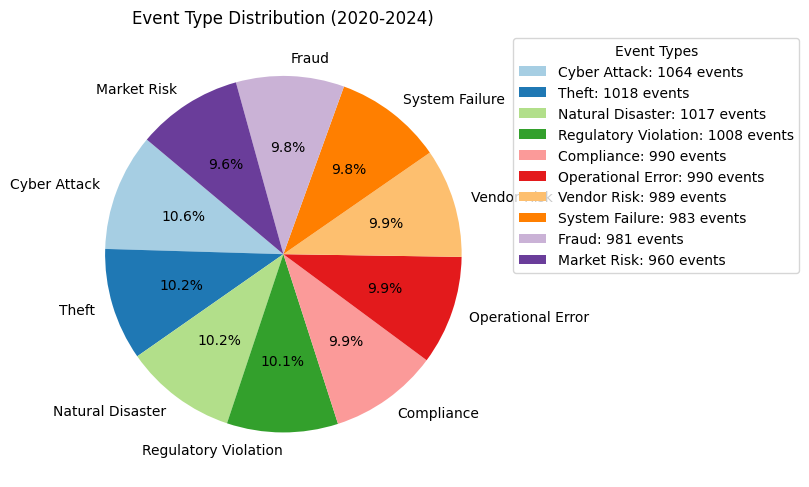

In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove records where Net Loss Amount is greater than 20 million (positive or negative)
df_filtered = df[abs(df['Net Loss Amount']) <= 20000000]

# Filter data for all 4 years (2020-2024)
df_filtered = df_filtered[df_filtered['Date'].dt.year >= 2020]

# Group by Event Type and count the occurrences
grouped_data_event_type = df_filtered['Event Type'].value_counts()

# Create a pie chart for Event Type counts (2020-2024)
fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted for a square-shaped pie chart

# Pie chart for Event Type distribution (2020-2024)
wedges, texts, autotexts = ax.pie(
    grouped_data_event_type, 
    labels=grouped_data_event_type.index,  # Labels are the Event Type names
    autopct='%1.1f%%',  # Display percentages on each slice
    startangle=140,  # Start the pie chart from an angle
    colors=plt.cm.Paired.colors  # Colors for each slice
)

# Add title
ax.set_title("Event Type Distribution (2020-2024)")

# Add legend outside the pie chart
ax.legend(
    wedges, 
    [f"{event_type}: {count} events" for event_type, count in zip(grouped_data_event_type.index, grouped_data_event_type)],
    title="Event Types", 
    loc="upper left", 
    bbox_to_anchor=(1, 1)  # Legend placed outside, in the upper-right corner
)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()


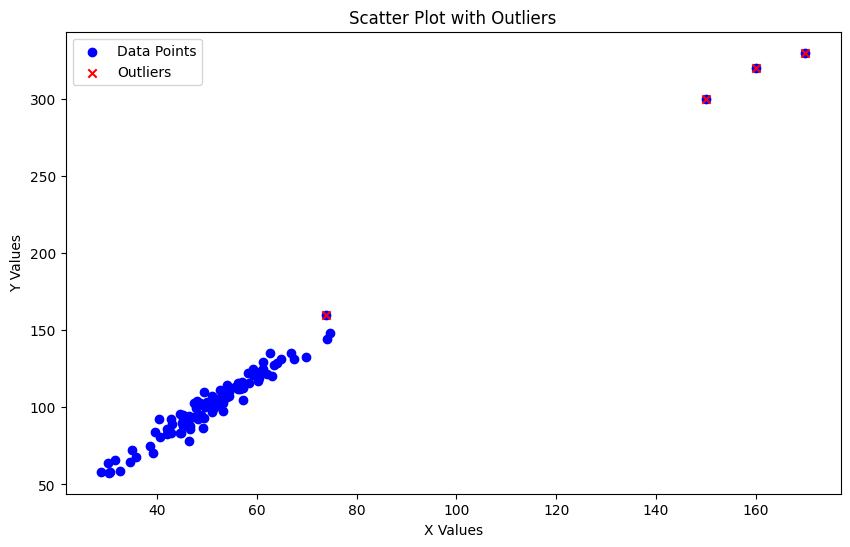

Outliers Data:
              X           Y
23    73.849673  160.025972
100  150.000000  300.000000
101  160.000000  320.000000
102  170.000000  330.000000


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Generate some data
np.random.seed(10)
x = np.random.normal(loc=50, scale=10, size=100)  # X values
y = 2 * x + np.random.normal(loc=0, scale=5, size=100)  # Y values with some noise

# Add some outliers
x_outliers = [150, 160, 170]
y_outliers = [300, 320, 330]
x = np.append(x, x_outliers)
y = np.append(y, y_outliers)

# Create a DataFrame for easier handling
df = pd.DataFrame({'X': x, 'Y': y})

# Scatter plot of all data points
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], color='blue', label='Data Points')

# Outliers detection using IQR
Q1_x = np.percentile(df['X'], 25)
Q3_x = np.percentile(df['X'], 75)
IQR_x = Q3_x - Q1_x
lower_bound_x = Q1_x - 1.5 * IQR_x
upper_bound_x = Q3_x + 1.5 * IQR_x

Q1_y = np.percentile(df['Y'], 25)
Q3_y = np.percentile(df['Y'], 75)
IQR_y = Q3_y - Q1_y
lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y

# Identify outliers
outliers = df[(df['X'] < lower_bound_x) | (df['X'] > upper_bound_x) |
              (df['Y'] < lower_bound_y) | (df['Y'] > upper_bound_y)]

# Plot outliers
plt.scatter(outliers['X'], outliers['Y'], color='red', label='Outliers', marker='x')

# Labels and title
plt.title("Scatter Plot with Outliers")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()

plt.show()

# Output the outliers data
print("Outliers Data:")
print(outliers)


In [29]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Example data (replace with your Monte Carlo simulation results)
data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Reshape data for scaler
data_reshaped = data.reshape(-1, 1)

# Initialize and apply RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_reshaped)

# The scaled data now has less sensitivity to outliers
print(scaled_data[:10])  # Check first 10 values


[[ 0.12466951]
 [ 1.77109432]
 [-0.46522939]
 [ 0.14843972]
 [-0.49233713]
 [-0.62737574]
 [ 1.28387072]
 [ 0.03900855]
 [-0.40461868]
 [-0.58136514]]
